YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


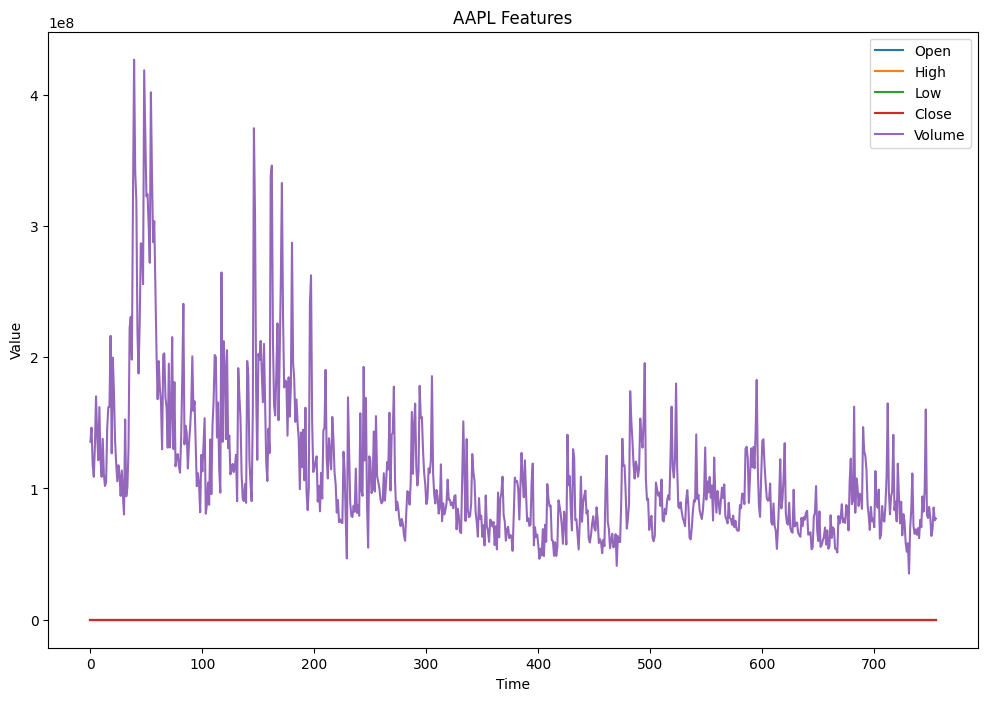

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fetch stock data
ticker = "AAPL"  # Example: Apple Inc.
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Use multiple features: Open, High, Low, Close, Volume
features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values

# Plot the features
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Open', 'High', 'Low', 'Close', 'Volume']):
    plt.plot(features[:, i], label=col)
plt.title(f'{ticker} Features')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0506 - val_loss: 0.0073
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095 - val_loss: 0.0073
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0029 - val_loss: 0.0033
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0025 - val_loss: 0.0039
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss

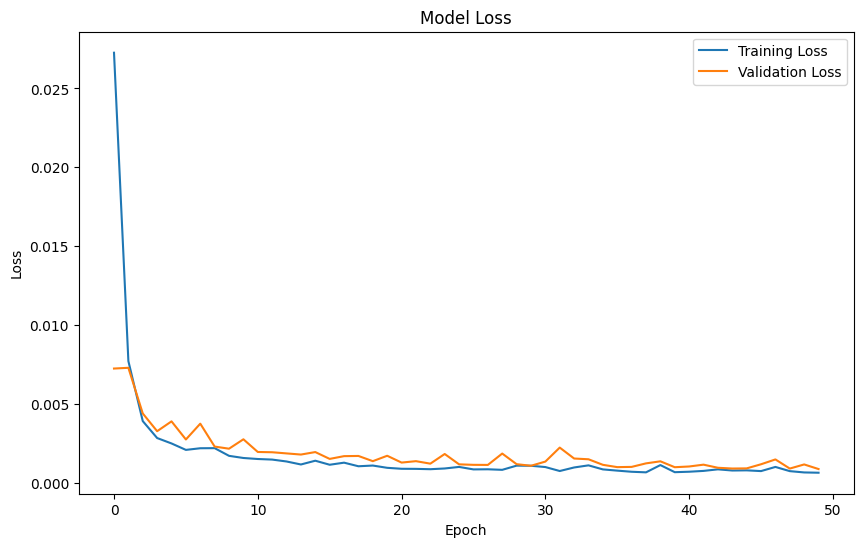

In [ ]:
def create_sequences(data, seq_length, target_col):
    """
    Create sequences of data for training an RNN model.

    Args:
        data (np.array): The input data (features).
        seq_length (int): The length of each sequence.
        target_col (int): The index of the target column.

    Returns:
        X (np.array): Input sequences.
        y (np.array): Target values.
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])  # Input sequence
        y.append(data[i + seq_length, target_col])  # Target value
    return np.array(X), np.array(y)

# Normalize the features manually
features_normalized = (features - np.min(features, axis=0)) / (np.max(features, axis=0) - np.min(features, axis=0))

# Create sequences
seq_length = 20  # Use 20 days of data to predict the next day
X, y = create_sequences(features_normalized, seq_length, target_col=3)  # Target is Close price (index 3)

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Build the model
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(seq_length, features.shape[1])))
model.add(Dense(1))  # Single output for predicting the next Close price
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[0.7375216 ]
 [0.7395263 ]
 [0.73908126]
 [0.7246673 ]
 [0.7284951 ]
 [0.7227304 ]
 [0.72503614]
 [0.7203875 ]
 [0.6774948 ]
 [0.63321173]
 [0.6307475 ]
 [0.63577574]
 [0.6060325 ]
 [0.6055355 ]
 [0.6320352 ]
 [0.63491666]
 [0.645594  ]
 [0.67273664]
 [0.69075644]
 [0.67789906]
 [0.6571161 ]
 [0.6440189 ]
 [0.6556628 ]
 [0.66107285]
 [0.6759375 ]
 [0.7068192 ]
 [0.71799713]
 [0.7137616 ]
 [0.7236086 ]
 [0.7107196 ]
 [0.70885926]
 [0.73744744]
 [0.7424168 ]
 [0.74498546]
 [0.75643617]
 [0.7809971 ]
 [0.7868817 ]
 [0.7787309 ]
 [0.77201617]
 [0.78002656]
 [0.7948015 ]
 [0.82372105]
 [0.84010094]
 [0.82978797]
 [0.84810615]
 [0.86547405]
 [0.8619011 ]
 [0.8644564 ]
 [0.86569124]
 [0.8835614 ]
 [0.8994691 ]
 [0.903863  ]
 [0.9176761 ]
 [0.92311835]
 [0.92938244]
 [0.934018  ]
 [0.9278847 ]
 [0.9066807 ]
 [0.8952786 ]
 [0.89511764]
 [0.901872  ]
 [0.89007926]
 [0.85200965]
 [0.84007627]
 [0.83741957]
 [0.8221661 ]
 [0.81728005]
 [0.8061083 ]
 [0.802151

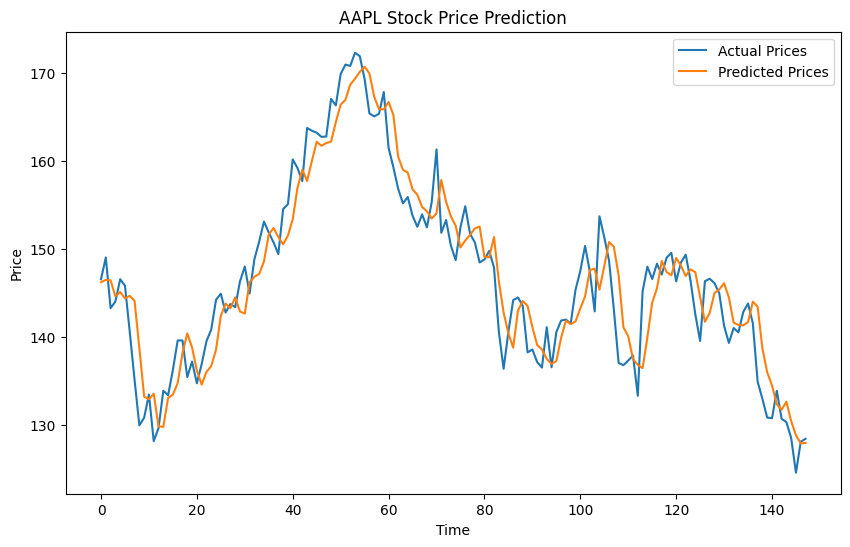

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)
print(y_pred)

# Denormalize predictions and actual values( predicted values getting to actual scale)
y_pred_denorm = y_pred * (np.max(features[:, 3]) - np.min(features[:, 3])) + np.min(features[:, 3])
y_test_denorm = y_test * (np.max(features[:, 3]) - np.min(features[:, 3])) + np.min(features[:, 3])

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_denorm, label='Actual Prices')
plt.plot(y_pred_denorm, label='Predicted Prices')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1989 - val_loss: 0.0094
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0166 - val_loss: 0.0056
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0120 - val_loss: 0.0052
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0108 - val_loss: 0.0047
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 - val_loss: 0.0047
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 - val_loss: 0.0049
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0067 - val_loss: 0.0036
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0081 - val_loss: 0.0035
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0068 - val_loss: 0.0036
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 - val_loss: 0.0037
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0074 - val_loss: 0.0033
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060 - 

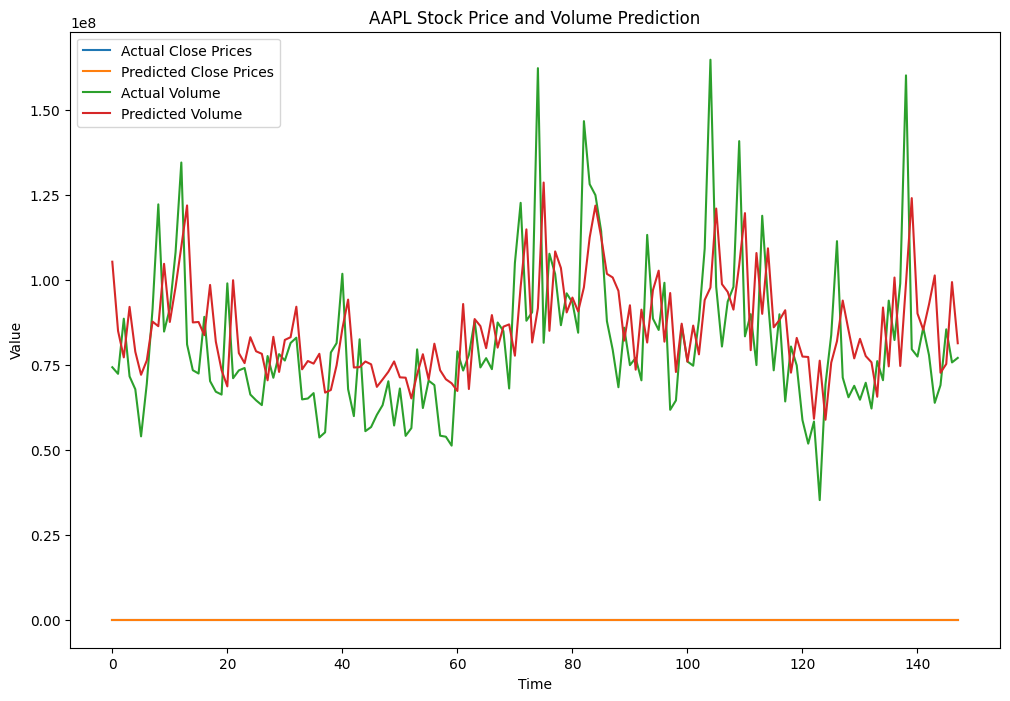

In [ ]:
def create_sequences_multi_output(data, seq_length, target_cols):
    """
    Create sequences of data for training an RNN model with multiple outputs.

    Args:
        data (np.array): The input data (features).
        seq_length (int): The length of each sequence.
        target_cols (list): The indices of the target columns.

    Returns:
        X (np.array): Input sequences.
        y (np.array): Target values.
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])  # Input sequence
        y.append(data[i + seq_length, target_cols])  # Target values
    return np.array(X), np.array(y)

# Create sequences with multiple targets
target_cols = [3, 4]  # Close (index 3) and Volume (index 4)
X_multi, y_multi = create_sequences_multi_output(features_normalized, seq_length, target_cols)

# Split into training and testing sets
split = int(0.8 * len(X_multi))
X_train_multi, X_test_multi = X_multi[:split], X_multi[split:]
y_train_multi, y_test_multi = y_multi[:split], y_multi[split:]

# Build a model for multiple outputs
model_multi = Sequential()
model_multi.add(SimpleRNN(50, activation='tanh', input_shape=(seq_length, features.shape[1])))
model_multi.add(Dense(len(target_cols)))  # Two outputs: Close and Volume
model_multi.compile(optimizer='adam', loss='mse')

# Train the model
history_multi = model_multi.fit(X_train_multi, y_train_multi, epochs=50, validation_data=(X_test_multi, y_test_multi))

# Predict on test data
y_multi_pred = model_multi.predict(X_test_multi)

# Denormalize predictions and actual values
y_multi_pred_denorm = y_multi_pred * (np.max(features[:, target_cols], axis=0) - np.min(features[:, target_cols], axis=0)) + np.min(features[:, target_cols], axis=0)
y_multi_test_denorm = y_test_multi * (np.max(features[:, target_cols], axis=0) - np.min(features[:, target_cols], axis=0)) + np.min(features[:, target_cols], axis=0)

# Plot predictions for Close and Volume
plt.figure(figsize=(12, 8))
plt.plot(y_multi_test_denorm[:, 0], label='Actual Close Prices')
plt.plot(y_multi_pred_denorm[:, 0], label='Predicted Close Prices')
plt.plot(y_multi_test_denorm[:, 1], label='Actual Volume')
plt.plot(y_multi_pred_denorm[:, 1], label='Predicted Volume')
plt.title(f'{ticker} Stock Price and Volume Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
